In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import tensorflow as tf

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from keras import backend as K
import sklearn

import time
%matplotlib inline

In [25]:
#Downloading the fashion mnist dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print('Train Rows: %d, columns: %d' % (x_train.shape[0], x_train.shape[1]))

print('Test Rows: %d, columns: %d' % (x_test.shape[0], x_test.shape[1]))

Train Rows: 60000, columns: 28
Test Rows: 10000, columns: 28


In [26]:
#convert to vectors - taken from Week 9 Breakout 

num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

print('Rows: %d, columns: %d' % (x_train.shape[0], x_train.shape[1]))

print('Rows: %d, columns: %d' % (x_test.shape[0], x_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


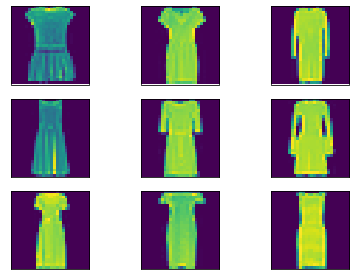

In [27]:
#visualizing the image set
fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(9):
    img = x_train[y_train ==3][i].reshape(28, 28)
    ax[i].imshow(img, interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

In [10]:
# SCRUB - TRANSFORM - N

x_train = x_train / 255
x_test = x_test / 255

In [11]:
# SCRUB - TRANSFORM FROM VECTOR TO BINARY MATRIX

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [12]:
# MODEL - BUILD BASE MODEL FOR MLP

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [13]:
# MODEL - FIT THE BASE MODEL

start = time.time()  # TRACK TIME

model = baseline_model()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)

# MODEL - RESULTS

scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

end = time.time()
final_time = end-start
print(final_time)  # RUN TIME OF BLOCK

Epoch 1/10
300/300 - 5s - loss: 0.5076 - accuracy: 0.8240 - val_loss: 0.4384 - val_accuracy: 0.8448
Epoch 2/10
300/300 - 5s - loss: 0.3739 - accuracy: 0.8663 - val_loss: 0.3741 - val_accuracy: 0.8693
Epoch 3/10
300/300 - 5s - loss: 0.3342 - accuracy: 0.8799 - val_loss: 0.3732 - val_accuracy: 0.8669
Epoch 4/10
300/300 - 5s - loss: 0.3070 - accuracy: 0.8891 - val_loss: 0.3456 - val_accuracy: 0.8778
Epoch 5/10
300/300 - 5s - loss: 0.2849 - accuracy: 0.8951 - val_loss: 0.3488 - val_accuracy: 0.8730
Epoch 6/10
300/300 - 5s - loss: 0.2691 - accuracy: 0.9024 - val_loss: 0.3409 - val_accuracy: 0.8763
Epoch 7/10
300/300 - 5s - loss: 0.2549 - accuracy: 0.9062 - val_loss: 0.3247 - val_accuracy: 0.8830
Epoch 8/10
300/300 - 5s - loss: 0.2435 - accuracy: 0.9101 - val_loss: 0.3261 - val_accuracy: 0.8830
Epoch 9/10
300/300 - 5s - loss: 0.2320 - accuracy: 0.9144 - val_loss: 0.3195 - val_accuracy: 0.8854
Epoch 10/10
300/300 - 5s - loss: 0.2231 - accuracy: 0.9176 - val_loss: 0.3192 - val_accuracy: 0.8853

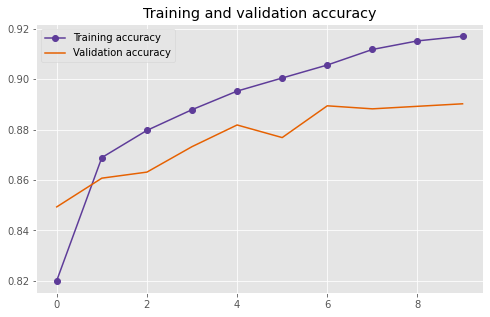

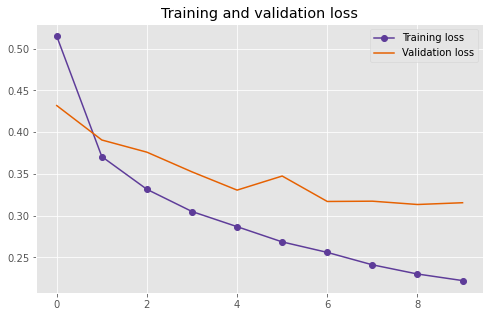

In [17]:
def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)

BAYES

In [29]:
# MODEL

# Initialize our classifier
gnb = GaussianNB()

start = time.time()  # TRACK TIME

# create the model
model = gnb.fit(x_train, y_train)


In [30]:

# Make predictions
preds = gnb.predict(x_test)
print(preds)
# Evaluate accuracy
end = time.time()
final_time = end-start
print(final_time)  # RUN TIME OF BLOCK
bayes = accuracy_score(y_test, preds)
print(bayes)


[7 4 1 ... 3 1 7]
2.978494644165039
0.5856


In [32]:

expected = y_test
predicted = preds
print(sklearn.metrics.confusion_matrix(expected, predicted))

[[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   0   1   1   0 278   3 660   5  52]
 [117  34 112 200 435   0  40   0  62   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  0   2  19  85 149   3  27   4 710   1]
 [  0   0   1   1   0  16   3 304   8 667]]


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
neigh.score(x_train, y_train)

In [34]:
from sklearn.ensemble import RandomForestClassifier 
start = time.time()  # TRACK TIME

forest = RandomForestClassifier(n_estimators = 100)
forest.fit(x_train, y_train)
print('Score: ', forest.score(x_test, y_test))
predictions = forest.predict(x_test)
forest = accuracy_score(y_test, predictions)
print(forest)
end = time.time()
final_time = end-start
print(final_time)

Score:  0.876
0.876
100.74703049659729


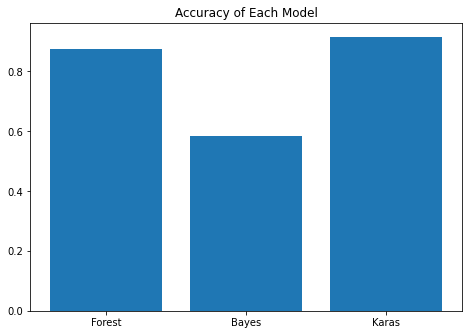

In [36]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Type = ['Forest', 'Bayes', 'Karas']
accuracy = [.876,.5856,.9168]
ax.bar(Type,accuracy)
plt.title('Accuracy of Each Model')
plt.show()